## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Lodaing the Datasets

In [3]:
fake_news = pd.read_csv('Fake.csv')
real_news = pd.read_csv('True.csv')

In [5]:
fake_news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [7]:
real_news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [9]:
fake_news['label'] = 0
fake_news.to_csv('Fake.csv', index=False)
real_news['label'] = 1
fake_news.to_csv('Real.csv', index=False)
print(fake_news.head()) 
print(real_news.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  
                                               title  \
0   Donald Trump Sends Out Embarrassing Ne

In [10]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/rohangarg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rohangarg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rohangarg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Data Preprocessing 

In [11]:
# Combine the datasets
combined_data = pd.concat([fake_news, real_news], ignore_index=True)

In [13]:
# Initialize Lemmatizer and Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    return ' '.join(tokens)

In [15]:
combined_data['cleaned_text'] = combined_data['text'].apply(preprocess_text)
print("Preview of Preprocessed Data:")
print(combined_data[['text', 'cleaned_text']].head())

Preview of Preprocessed Data:
                                                text  \
0  Donald Trump just couldn t wish all Americans ...   
1  House Intelligence Committee Chairman Devin Nu...   
2  On Friday, it was revealed that former Milwauk...   
3  On Christmas day, Donald Trump announced that ...   
4  Pope Francis used his annual Christmas Day mes...   

                                        cleaned_text  
0  donald trump wish american happy new year leav...  
1  house intelligence committee chairman devin nu...  
2  friday revealed former milwaukee sheriff david...  
3  christmas day donald trump announced would bac...  
4  pope francis used annual christmas day message...  


In [17]:
# Initialize TF-IDF Vectorizer(feature extraction)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit features to top 5000 words

# Fit and transform the cleaned text
tfidf_features = tfidf_vectorizer.fit_transform(combined_data['cleaned_text'])

print("TF-IDF Matrix Shape:", tfidf_features.shape)

TF-IDF Matrix Shape: (46962, 5000)


## Training the Model

In [19]:
# Labels and features
X = tfidf_features
y = combined_data['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (37569, 5000)
Testing Data Shape: (9393, 5000)


## Machine Learning Algorithms 

In [21]:
# Define the models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

Training and evaluating Logistic Regression...
Logistic Regression Accuracy: 0.29
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.28      0.28      4697
           1       0.29      0.30      0.29      4696

    accuracy                           0.29      9393
   macro avg       0.29      0.29      0.29      9393
weighted avg       0.29      0.29      0.29      9393

Confusion Matrix:
 [[1321 3376]
 [3302 1394]]
--------------------------------------------------
Training and evaluating Naive Bayes...
Naive Bayes Accuracy: 0.31
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.31      0.31      4697
           1       0.32      0.32      0.32      4696

    accuracy                           0.31      9393
   macro avg       0.31      0.31      0.31      9393
weighted avg       0.31      0.31      0.31      9393

Confusion Matrix:
 [[1433 3264]
 [3185 1511]]
-------

In [26]:
# Define the individual models
model1 = LogisticRegression()
model2 = MultinomialNB()
model3 = DecisionTreeClassifier()
model4 = RandomForestClassifier()
model5 = SVC()

# Create a Voting Classifier (hard voting by default)
voting_clf = VotingClassifier(estimators=[
    ('lr', model1),
    ('nb', model2),
    ('dt', model3),
    ('rf', model4),
    ('svm', model5)
], voting='hard') 

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Predict with the Voting Classifier
y_pred = voting_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Consolidated Accuracy (Voting Classifier): {accuracy:.2f}")

Consolidated Accuracy (Voting Classifier): 0.15


## Deep Learning Algorithms

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [30]:
# Initialize the tokenizer
tokenizer = Tokenizer(num_words=5000)  # Limit vocabulary size to 5000 most frequent words
tokenizer.fit_on_texts(combined_data['cleaned_text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(combined_data['cleaned_text'])

# Pad sequences to ensure uniform length
max_sequence_length = 100  # Choose a fixed length
X_padded = pad_sequences(sequences, maxlen=max_sequence_length)

# Labels
y = combined_data['label']


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [37]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_sequence_length),
    LSTM(128, return_sequences=False),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])


/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [41]:
history = model.fit(
    X_train, y_train,
    epochs=5,  # Adjust epochs based on performance
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/5
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 72s 61ms/step - accuracy: 0.4931 - loss: 0.6938 - val_accuracy: 0.4949 - val_loss: 0.6934
Epoch 2/5
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 74s 63ms/step - accuracy: 0.4985 - loss: 0.6935 - val_accuracy: 0.5027 - val_loss: 0.6937
Epoch 3/5
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 77s 66ms/step - accuracy: 0.4970 - loss: 0.6936 - val_accuracy: 0.4978 - val_loss: 0.6933
Epoch 4/5
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 71s 61ms/step - accuracy: 0.4965 - loss: 0.6932 - val_accuracy: 0.4840 - val_loss: 0.6934
Epoch 5/5
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 70s 60ms/step - accuracy: 0.5073 - loss: 0.6933 - val_accuracy: 0.4998 - val_loss: 0.6931


In [43]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Test Accuracy: {test_accuracy:.2f}")

LSTM Test Accuracy: 0.50


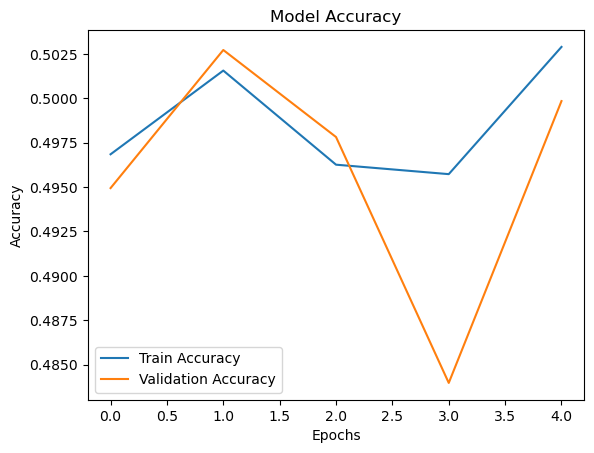

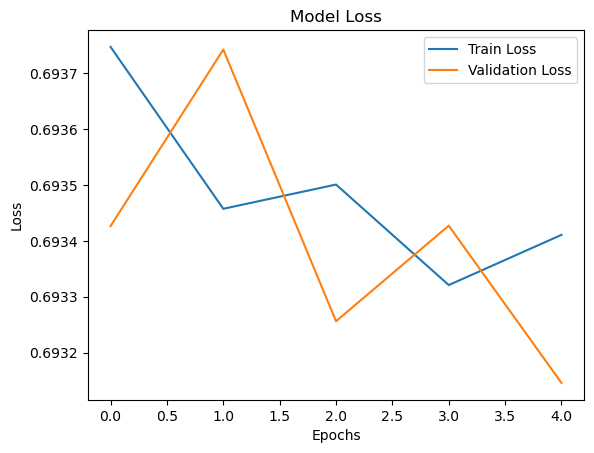

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [85]:
# Function to preprocess the input text (same as during training)
def preprocess_input_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    return ' '.join(tokens)

# Function to predict if the news is real or fake
def predict_news(text):
    # Preprocess the input text
    cleaned_text = preprocess_input_text(text)
    
    # Transform the cleaned text using the fitted TF-IDF vectorizer
    tfidf_input = tfidf_vectorizer.transform([cleaned_text])  # Note: tfidf_vectorizer.transform, not fit_transform
    
    # Get the trained SVC model from the models dictionary
    svc_model = models["Support Vector Machine"]
    
    # Make the prediction using the trained SVC model
    prediction = svc_model.predict(tfidf_input)  # Using the SVC model that was trained during the pipeline
    
    # Return the result based on the prediction
    if prediction == 1:
        return "Real News"
    else:
        return "Fake News"

# Get input from the user
user_input = input("Enter the news article: ")

# Get the prediction from the model
prediction = predict_news(user_input)

# Print the result
print(f"Prediction: {prediction}")


Enter the news article:  Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His 

Prediction: Real News
